# Predicting Home Prices in Banglore

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataframe1 = pd.read_csv("Banglore_House_Data.csv")

In [4]:
dataframe1.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [5]:
dataframe1.shape

(13320, 9)

In [6]:
dataframe1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
dataframe1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
dataframe1['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [9]:
dataframe1['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [10]:
dataframe1['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [11]:
dataframe1['society'].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [12]:
dataframe1.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [13]:
dataframe1.shape

(13320, 9)

# Handling Missing Values from the features 

In [14]:
dataframe1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [15]:
percent_missing = dataframe1.isnull().sum() * 100 / len(dataframe1)
print(percent_missing)

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64


In [16]:
dataframe1['society'] = dataframe1['society'].fillna(dataframe1['society'].mode()[0])

In [17]:
dataframe1['balcony'] = dataframe1['balcony'].fillna(dataframe1['balcony'].mode()[0])

In [18]:
dataframe1['bath'] = dataframe1['bath'].fillna(dataframe1['bath'].mode()[0])

In [19]:
dataframe1['location'] = dataframe1['location'].fillna(dataframe1['location'].mode()[0])

In [20]:
dataframe1['size'] = dataframe1['size'].fillna(dataframe1['size'].mode()[0])

In [21]:
dataframe1.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [22]:
dataframe1.head(1)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07


Area type VS price

<AxesSubplot:xlabel='area_type', ylabel='price'>

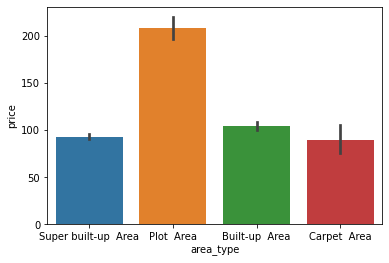

In [23]:
sns.barplot(x = 'area_type',
            y = 'price',
            data = dataframe1)

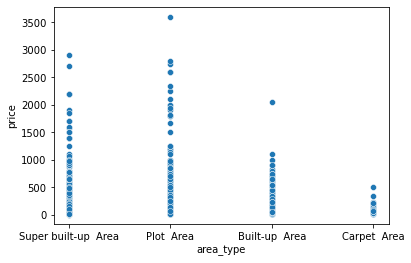

In [24]:
sns.scatterplot(x="area_type", y="price", data=dataframe1)
plt.show()

Availability vs price 

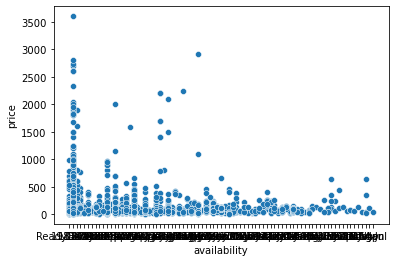

In [25]:
sns.scatterplot(x="availability", y="price", data=dataframe1)
plt.show()

In [26]:
dataframe1.availability = dataframe1.availability.apply(lambda x: x if x in ['Ready To Move','Immediate Possession']else 'In Future')

In [27]:
dataframe1.availability.unique()

array(['In Future', 'Ready To Move', 'Immediate Possession'], dtype=object)

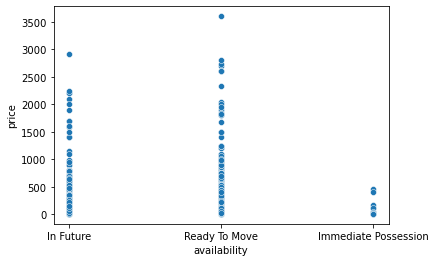

In [28]:
sns.scatterplot(x="availability", y="price", data=dataframe1)
plt.show()

location vs price 

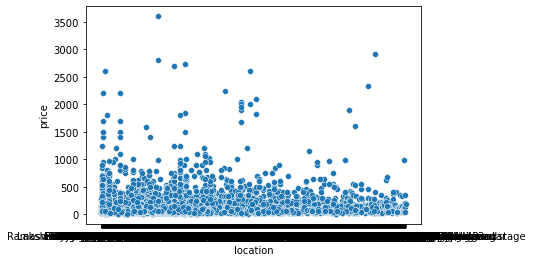

In [29]:
sns.scatterplot(x="location", y="price", data=dataframe1)
plt.show()

Size VS Price 

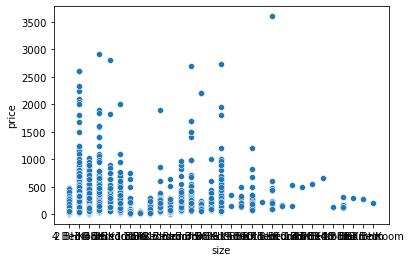

In [30]:
sns.scatterplot(x="size", y="price", data=dataframe1)
plt.show()

Distribution of bath feature

<AxesSubplot:>

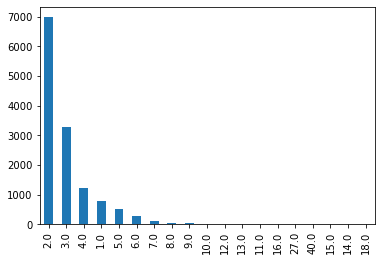

In [31]:
dataframe1.bath.value_counts().plot(kind='bar')

Distribution of balcony feature

<AxesSubplot:>

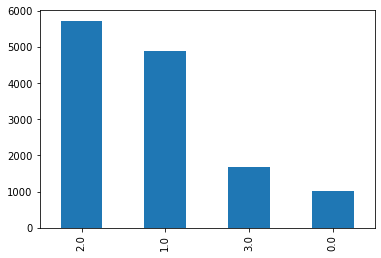

In [32]:
dataframe1.balcony.value_counts().plot(kind='bar')

Balcony vs Price

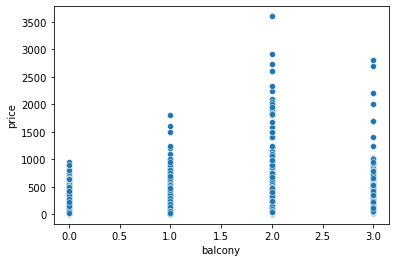

In [33]:
sns.scatterplot(x="balcony", y="price", data=dataframe1)
plt.show()

According to this plot balcony features does not affect our price .

In [34]:
dataframe2=dataframe1.copy()
dataframe2['size_in_bhk'] = dataframe2['size'].apply(lambda x: int(x.split(' ')[0]))
dataframe2.size_in_bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [35]:
dataframe2.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,size_in_bhk
0,Super built-up Area,In Future,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0,51.00,2


Size in BHK vs Price 

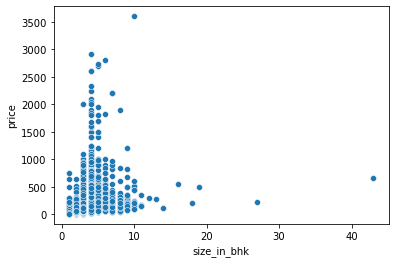

In [36]:
sns.scatterplot(x="size_in_bhk", y="price", data=dataframe2)
plt.show()

In [37]:
dataframe2.shape

(13320, 10)

Handling range value of total_sqft feature

In [38]:
dataframe2.total_sqft.unique()
##some of the values are in range . so we have to convert it to a single value 

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

getting square ft values in range . So we can take the avg of mean and max .

In [39]:
def covert_to_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [40]:
#here we are trying to check all the values whgich are in range . ~ is used here to show the values which are not a single float value
dataframe2[~dataframe2['total_sqft'].apply(covert_to_float)].head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,size_in_bhk
30,Super built-up Area,In Future,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,In Future,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,2.0,2.0,192.000,4
81,Built-up Area,In Future,Hennur Road,4 Bedroom,Gollela,2957 - 3450,2.0,2.0,224.500,4
122,Super built-up Area,In Future,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,In Future,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,In Future,Sarjapur,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800,2
224,Super built-up Area,In Future,Devanahalli,3 BHK,Jurdsig,1520 - 1740,2.0,2.0,74.820,3
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,GrrvaGr,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,In Future,Hennur Road,2 BHK,Shxorm,1195 - 1440,2.0,0.0,63.770,2


In [41]:
#For such case we can just take average of min and max value in the range.
#there are some values which are not in same range so we are going to drop those value .
def range_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None  

In [42]:
dataframe2.total_sqft = dataframe2.total_sqft.apply(range_to_num)

In [43]:
dataframe2.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,size_in_bhk
0,Super built-up Area,In Future,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200.0,2.0,1.0,51.00,2
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2
6,Super built-up Area,In Future,Old Airport Road,4 BHK,Jaades,2732.0,4.0,2.0,204.00,4
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300.0,4.0,2.0,600.00,4
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,GrrvaGr,1310.0,3.0,1.0,63.25,3
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,GrrvaGr,1020.0,6.0,2.0,370.00,6


In [44]:
dataframe2.shape

(13320, 10)

In [45]:
dataframe2.total_sqft.unique() ##No values in range .

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [46]:
dataframe2.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,size_in_bhk
0,Super built-up Area,In Future,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200.0,2.0,1.0,51.00,2


Univariate analysis for area_type

C:\Users\soura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


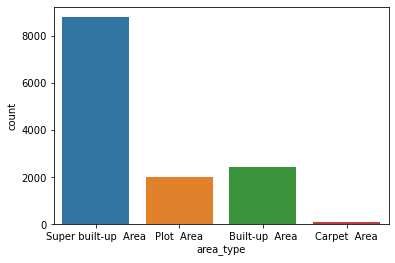

In [47]:
sns.countplot(dataframe2["area_type"])
plt.show()

The majority of the properties are of Super built-up Area type

Plot area average price is almost double than other areas price .

# Analysis for area_type feature

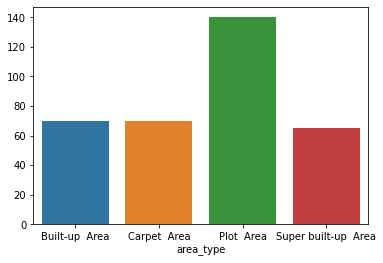

In [48]:
plot_avg_price = dataframe2.groupby("area_type")["price"].median()
sns.barplot(x=plot_avg_price.index, y=plot_avg_price.values)
plt.show()

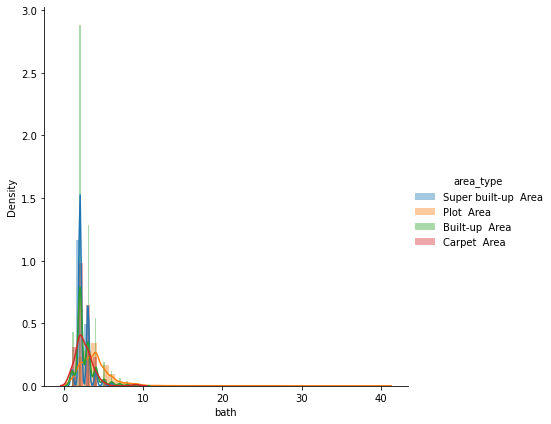

In [49]:
import warnings
warnings.filterwarnings('ignore')

sns.FacetGrid(dataframe2, hue='area_type', height=6).map(sns.distplot, 'bath').add_legend()
plt.show()

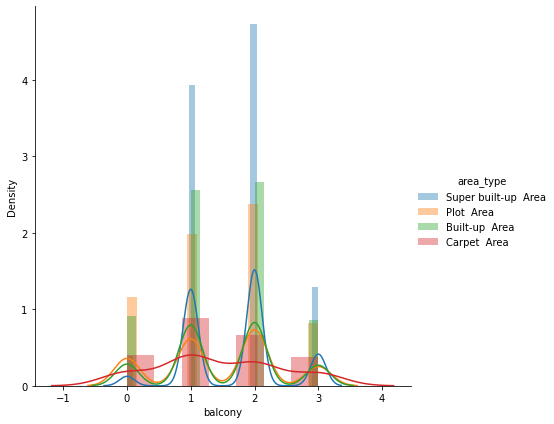

In [50]:
sns.FacetGrid(dataframe2, hue='area_type', height=6).map(sns.distplot, 'balcony').add_legend()
plt.show()

# Analysis for availability feature

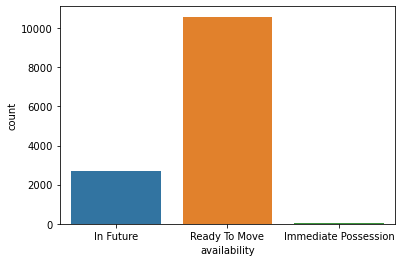

In [51]:
sns.countplot(dataframe2["availability"])
plt.show()

Most of the properties are ready to move .
There are few properties will be available in the near future.

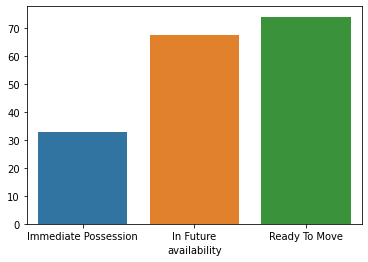

In [52]:
dataframe3=dataframe2.copy()
availability_avg_price = dataframe3.groupby("availability")["price"].median()
sns.barplot(x=availability_avg_price.index, y=availability_avg_price.values)
plt.show()

Ready to move properties are slighly less price than future moving property .

# total_sqft vs price

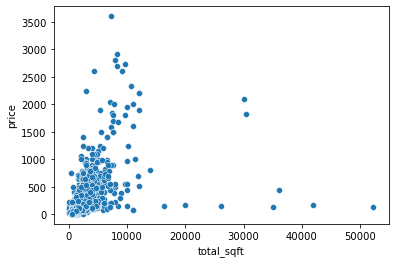

In [53]:
sns.scatterplot(x="total_sqft", y="price", data=dataframe2)
plt.show()

Price inceares with total_sqft .

* According to the above graph we can remove the less important features .

In [54]:
#reference:  https://www.kaggle.com/iamsouravbanerjee/bangalore-house-price-prediction
dataframe3 = dataframe2.drop(["area_type", "society","balcony", "availability"], axis = "columns")

In [55]:
dataframe3.head(5)

,location,size,total_sqft,bath,price,size_in_bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


* from the above plots we get to know that locations ,area_type are some iuseless features to our model .
* The most important feature for our model are size_in_bhk,total_sqft .

# Feature Engineering : Let's build some new features 

In [56]:
##we are trying to get the price per squareft
#dataframe3=dataframe2.drop(['area_type','society','balcony','availability'],axis='columns') 
##we assume these features are not usefull for our model 
dataframe3['price_per_sqft'] = dataframe3['price']*100000/dataframe3['total_sqft']

In [57]:
dataframe3.head()

,location,size,total_sqft,bath,price,size_in_bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [58]:
dataframe3.shape

(13320, 7)

In [59]:
dataframe3.location = dataframe3.location.apply(lambda x: x.strip()) ##strip function will remove extra space from location
each_location_count = dataframe3['location'].value_counts(ascending=False)
each_location_count

Whitefield                        542
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1294, dtype: int64

In [60]:
print("Total no. of locations available :",len(each_location_count))
print("Total no. of locations which has greater than 100 property:",len(each_location_count[each_location_count>100]))
location_count_less_than_10=each_location_count[each_location_count<10]
print(location_count_less_than_10)

Total no. of locations available : 1294
Total no. of locations which has greater than 100 property: 16
Vishwanatha Nagenahalli           9
Chennammana Kere                  9
2nd Phase JP Nagar                9
Jakkur Plantation                 9
B Narayanapura                    9
                                 ..
Bapuji Layout                     1
1st Stage Radha Krishna Layout    1
BEML Layout 5th stage             1
singapura paradise                1
Abshot Layout                     1
Name: location, Length: 1040, dtype: int64


Any location having less than 10 data points should be tagged as "other" location. 
This way number of categories can be reduced by huge amount. 
Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [61]:
dataframe3.location = dataframe3.location.apply(lambda x: 'others' if x in location_count_less_than_10 else x)
len(dataframe3.location.unique())

255

No. Of unique locations reduced from 1293 to 255 .This dimension reduction will help us during model building .

# Outlier Removal

According to domain knowledge we know that min 300 square ft required to build a bedroom .So for 2 bhk min is 600 sq ft .
So we can check and remove those outliers .

In [62]:
dataframe3[dataframe3.total_sqft/dataframe3.size_in_bhk<300].head()
##here we are getting lots of outliers . 6 bedrrom with 1020sqft is not possible .

,location,size,total_sqft,bath,price,size_in_bhk,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [63]:
dataframe3.shape

(13320, 7)

In [64]:
dataframe4 = dataframe3[~(dataframe3.total_sqft/dataframe3.size_in_bhk<300)]
dataframe4.shape
##outliers have been removed . We can see the shape .

(12576, 7)

## We can use mean and standard deviation to remove outliers from price .

In [65]:
dataframe4.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we see the min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices.
So here by using the concepts of mean and standard deviations we can remove the outliers .

In [66]:
def outlier_removal(dataframe):
    df = pd.DataFrame()
    for key, subdf in dataframe.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std_dev = np.std(subdf.price_per_sqft)
        reduced_dataframe = subdf[(subdf.price_per_sqft>(mean-std_dev)) & (subdf.price_per_sqft<=(mean+std_dev))]
        df = pd.concat([df,reduced_dataframe],ignore_index=True)
    return df
dataframe5 = outlier_removal(dataframe4)
dataframe5.shape

(10282, 7)

In [67]:
import matplotlib

# Checking price fro different areas for different BHK

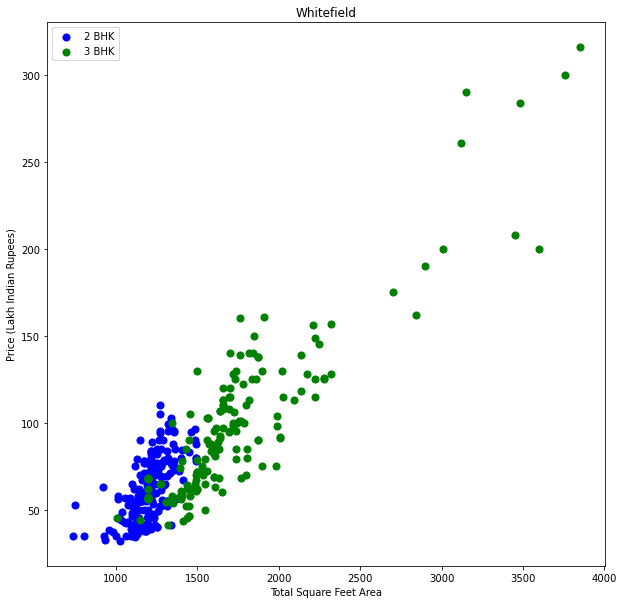

In [68]:
def plot_scatter(dataframe,location):
    bhk2 = dataframe[(dataframe.location==location) & (dataframe.size_in_bhk==2)]
    bhk3 = dataframe[(dataframe.location==location) & (dataframe.size_in_bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (10,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter(dataframe5,"Whitefield")

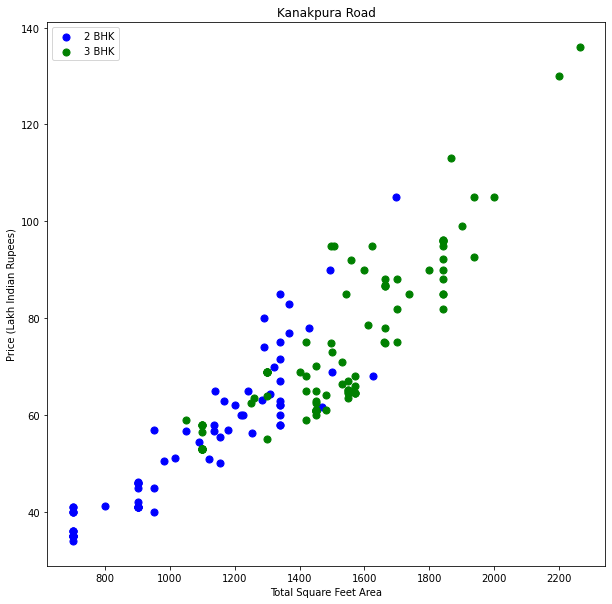

In [69]:
plot_scatter(dataframe5,"Kanakpura Road")

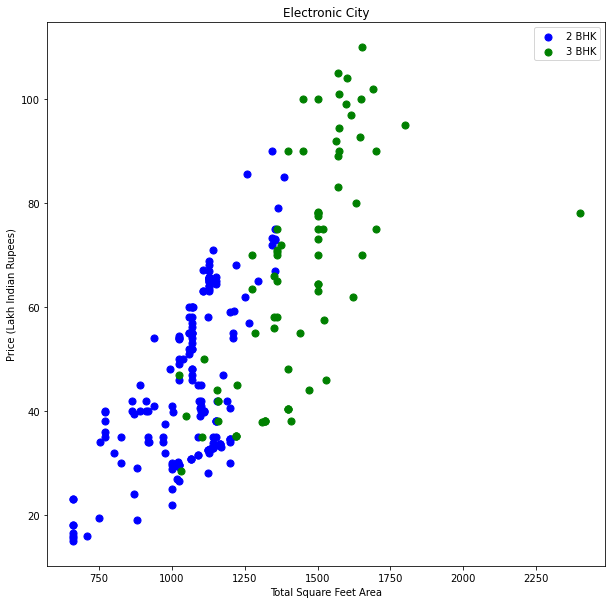

In [70]:
plot_scatter(dataframe5,"Electronic City")

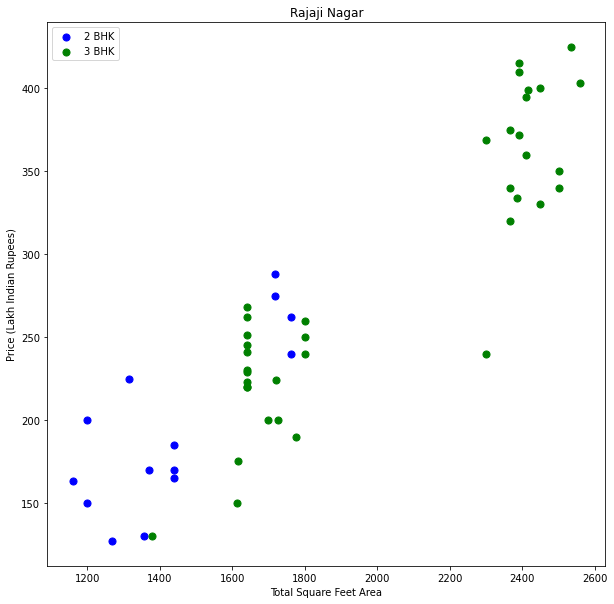

In [71]:
plot_scatter(dataframe5,"Rajaji Nagar")

According to this plots we can observe that for same square ft. area 3bhk flat is cheaper than 2bhk flat .
But according to domain knowledge 2 bhk flat should be cheaper than 3bhk .So those points are outliers .
We have to remove these outliers .

In [72]:
def remove_bhk_outliers(dataframe):
    remove_indices = np.array([])
    for loc, loc_df in dataframe.groupby('location'):
        bhk_group = {}
        for bhk, bhk_df in loc_df.groupby('size_in_bhk'):
            bhk_group[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in loc_df.groupby('size_in_bhk'):
            stat = bhk_group.get(bhk-1)
            if stat and stat['count']>5:
                remove_indices = np.append(remove_indices, bhk_df[bhk_df.price_per_sqft<(stat['mean'])].index.values)
    return dataframe.drop(remove_indices,axis='index')
dataframe6 = remove_bhk_outliers(dataframe5)
dataframe6.shape

(7402, 7)

# After removal of outliers ,checking distribution for different areas

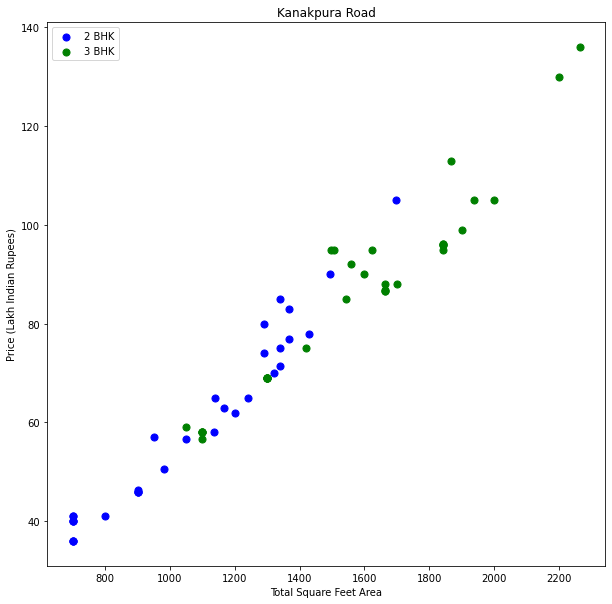

In [73]:
plot_scatter(dataframe6,"Kanakpura Road")

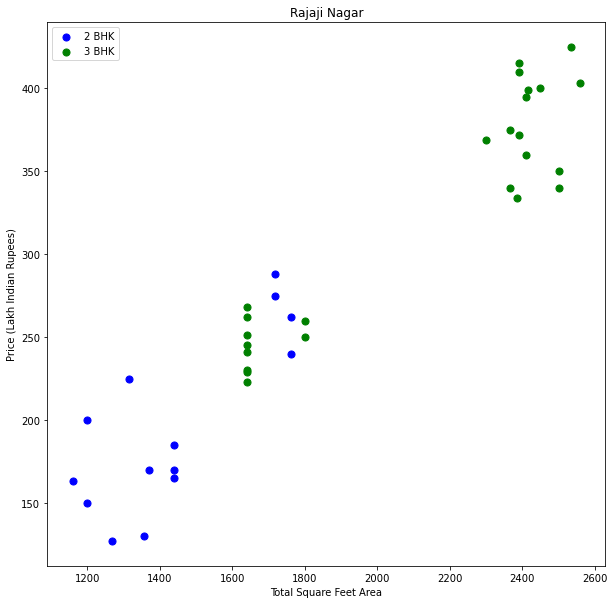

In [74]:
plot_scatter(dataframe6,"Rajaji Nagar")

According to the plots we have removed the outtliers .

In [75]:
dataframe6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [76]:
dataframe6.shape

(7402, 7)

In [77]:
dataframe6[dataframe6.bath>dataframe6.size_in_bhk+2]

,location,size,total_sqft,bath,price,size_in_bhk,price_per_sqft
585,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1653,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5341,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6840,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8533,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


Text(0, 0.5, 'Count')

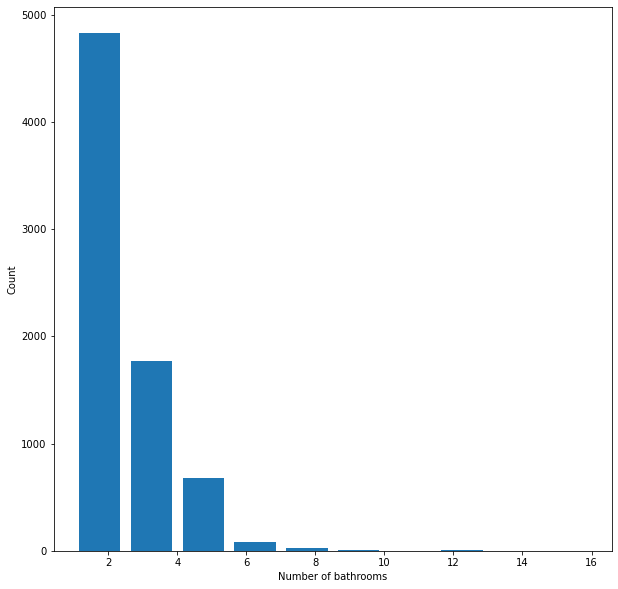

In [78]:
plt.hist(dataframe6.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

We can observe that there are some properties where bathroom count is more than the rooms .
According to domain knowledge it is not possible .So those are outliers .

In [79]:
dataframe7=dataframe6[dataframe6.bath<dataframe6.size_in_bhk+2]
dataframe7.shape
#now we removed those outliers .

(7323, 7)

In [80]:
dataframe7.head(10)

,location,size,total_sqft,bath,price,size_in_bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
7,1st Block Koramangala,2 BHK,1415.0,2.0,110.0,2,7773.851590
8,1st Block Koramangala,2 BHK,860.0,2.0,65.5,2,7616.279070
9,1st Block Koramangala,4 BHK,3000.0,3.0,300.0,4,10000.000000


size column is not required as size_inbhk is available . and price per squareft is also not required ,
as we used that column to find outliers .

In [81]:
dataframe8=dataframe7.drop(['size','price_per_sqft'],axis='columns')
dataframe8.head(10)

,location,total_sqft,bath,price,size_in_bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,368.0,4
7,1st Block Koramangala,1415.0,2.0,110.0,2
8,1st Block Koramangala,860.0,2.0,65.5,2
9,1st Block Koramangala,3000.0,3.0,300.0,4


In [82]:
dataframe8.shape

(7323, 5)

In [83]:
location_count = pd.get_dummies(dataframe8.location)
location_count.head(10)

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
dataframe9=pd.concat([dataframe8,location_count.drop('others',axis='columns')],axis='columns')
dataframe9.head(5)

,location,total_sqft,bath,price,size_in_bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Though we have added one hot encoding of locations so we can remove locations cloumn .

In [85]:
dataframe9.shape

(7323, 259)

In [86]:
dataframe10=dataframe9.drop('location',axis='columns')

In [87]:
dataframe10.shape

(7323, 258)

In [88]:
X = dataframe10.drop(['price',],axis='columns')

In [89]:
y=dataframe10.price

# Modeling

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [91]:
from sklearn.metrics import mean_squared_error
def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))

In [92]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
model_rmse = rmse(y_test, model_lr.predict(X_test))
model_score = model_lr.score(X_test,y_test)
model_score,model_rmse

(0.8533485320308041, 28.39035647611772)

In [93]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cross_val = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cross_val)

array([0.78317738, 0.89209075, 0.81866314, 0.90236545, 0.83390886])

In [94]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(X_train,y_train)
model1_score = model1.score(X_test,y_test)
model1_rmse = rmse(y_test, model1.predict(X_test))
model1_score,model1_rmse

(0.8228197889171539, 31.205794610693825)

In [95]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
model2 = Lasso()
model2.fit(X_train, y_train)
model2_score=model2.score(X_test, y_test)
model2_rmse = rmse(y_test, model2.predict(X_test))
model2_score, model2_rmse

(0.6858502392717083, 41.55238966764821)

In [96]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
svr_score=svr.score(X_test,y_test)
svr_rmse = rmse(y_test, svr.predict(X_test))
svr_score, svr_rmse

(0.675566927886811, 42.226997045515056)

In [97]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgf= xgb_reg.fit(X_train,y_train)
xgb_reg_score=xgb_reg.score(X_test,y_test) 
xgb_reg_rmse = rmse(y_test, xgb_reg.predict(X_test))
xgb_reg_score, xgb_reg_rmse


(0.8756290915239167, 26.144903410058976)

# Finding best model accordoing to accuracy 

In [98]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB

def find_best_model_using_gridsearchcv(X,y):
    algorithims = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'xg_boost':{
            'model' : xgboost.XGBRegressor(),
            'params' :{
                'criterion' : ['mse','rmse'],
                'splitter': ['best','random']              
            }
        }          
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for model_name, config in algorithims.items():
        grid =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        grid.fit(X,y)
        scores.append({
            'model': model_name,
            'best_score': grid.best_score_,
            'best_params': grid.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

[10:59:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion", "splitter" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:59:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion", "splitter" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:59:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion", "splitter" 

[10:59:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion", "splitter" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




,model,best_score,best_params
0,linear_regression,0.846041,{'normalize': False}
1,xg_boost,0.820067,"{'criterion': 'mse', 'splitter': 'best'}"


In [99]:
def predict_price(location,sqft,bath,bhk):    

    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return model_lr.predict([x])[0]

In [100]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

84.92019955081979

In [101]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

88.87090976734575

# Stacking Model

In [102]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import StackingRegressor

#def get_stacking():
    # define the base models
    initial_est = list()
    initial_est.append(('LR', LinearRegression()))
    initial_est.append(('RF', RandomForestRegressor()))
    initial_est.append(('Lasso', Lasso()))
    initial_est.append(('svm', SVR()))
    initial_est.append(('xgb',  xgboost.XGBRegressor()))
    # define meta learner model
    meta_est = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=initial_est, final_estimator=meta_est, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['LR'] = LinearRegression()
    models['RF'] = RandomForestRegressor()
    models['Lasso'] = Lasso()
    models['svm'] = SVR()
    models['XGB'] = xgboost.XGBRegressor()
    models['stacking'] = get_stacking()
                                      
    return models
 
# evaluate a given model using cross-validation
#def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

IndentationError: unexpected indent (Temp/ipykernel_304/934911133.py, line 9)

We can see that in this case, XGB performs the best with a mean negative MAE of about -16.

In [ ]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model_lr,f)

In [103]:
print(pd.DataFrame([{'Model': 'Linear Regression','Score':model_score, "RMSE":model_rmse},
              {'Model': 'Random Forest','Score':model1_score, "RMSE":model1_rmse},
              {'Model': 'Lasso','Score':model2_score, "RMSE":model2_rmse},
              {'Model': 'Support Vector Machine','Score':svr_score, "RMSE":svr_rmse},
              {'Model': 'XGBoost','Score':xgb_reg_score, "RMSE":xgb_reg_rmse}],
             columns=['Model','Score','RMSE']))

                    Model     Score       RMSE
0       Linear Regression  0.853349  28.390356
1           Random Forest  0.822820  31.205795
2                   Lasso  0.685850  41.552390
3  Support Vector Machine  0.675567  42.226997
4                 XGBoost  0.875629  26.144903


In [ ]:
#import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [ ]:
#import joblib
joblib.dump(model_lr, 'bangalore_house_price_prediction_lr_model.pkl')

In [104]:
!python -m pip list

Package                            Version
---------------------------------- -----------------
absl-py                            0.14.1
alabaster                          0.7.12
altair                             4.1.0
anaconda-client                    1.8.0
anaconda-navigator                 2.0.3
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astor                              0.8.1
astroid                            2.6.6
astropy                            4.3.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.6
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6

sphinxcontrib-websupport           1.2.4
spyder                             4.2.5
spyder-kernels                     1.10.2
SQLAlchemy                         1.4.22
statsmodels                        0.12.2
streamlit                          1.3.0
sympy                              1.8
tables                             3.6.1
tblib                              1.7.0
tensorboard                        2.6.0
tensorboard-data-server            0.6.1
tensorboard-plugin-wit             1.8.0
tensorflow                         2.6.0
tensorflow-estimator               2.6.0
termcolor                          1.1.0
terminado                          0.9.4
testpath                           0.5.0
textdistance                       4.2.1
threadpoolctl                      2.2.0
three-merge                        0.1.1
tifffile                           2021.7.2
toml                               0.10.2
toolz                              0.11.1
tornado                            6.1
tqdm        